# CS 4662 Project - Gender Classification 👨 👩

## Team Members:
- Brandon Gonzalez
- Mark Kalaiji
- Joaquin Robles

In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# reading the .csv and seeing its size
gender_df = pd.read_csv('attributes.csv')
gender_df.shape

(20259, 42)

In [3]:
# seeing what features the columns provide
gender_df.head()

,Unnamed: 0,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,50733,050734.jpg,-1,-1,1,-1,-1,1,1,-1,...,-1,1,-1,1,-1,-1,-1,-1,-1,1
1,88879,088880.jpg,-1,-1,1,-1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1
2,137280,137281.jpg,-1,-1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
3,119289,119290.jpg,-1,-1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,28943,028944.jpg,1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [4]:
# feature matrix and label vector
X = gender_df[['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']]
y = gender_df['Male']

In [5]:
# split data set into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [6]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

gender_dt = DecisionTreeClassifier(random_state=2)

# training on training set
gender_dt.fit(X_train, y_train)

# testing on testing set
y_predict_dt = gender_dt.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, y_predict_dt)
print('Decision Tree Accuracy:', accuracy_dt*100,'%')

Decision Tree Accuracy: 91.24712076340901 %


In [7]:
# predict probability of 'Male'
y_predict_prob_dt = gender_dt.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics

fpr_dt, tpr_dt, thresholds = metrics.roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)

# auc
AUC_dt = metrics.auc(fpr_dt, tpr_dt)
print('AUC Decision Tree =',AUC_dt*100,'%')

AUC Decision Tree = 92.433627028966 %


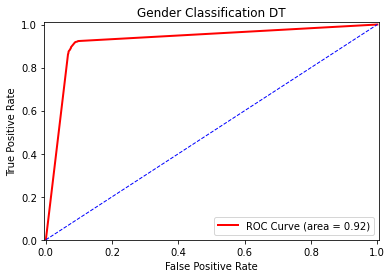

In [8]:
# plot roc curve
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_dt)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification DT')
plt.legend(loc="lower right")

plt.show()

In [9]:
# cross val
from sklearn.model_selection import cross_val_score
cross_val_dt = DecisionTreeClassifier(random_state=2)
dt_accuracies_cv = cross_val_score(cross_val_dt, X, y, cv=10, scoring='accuracy')
mean_dt = dt_accuracies_cv.mean()
print('Mean =',mean_dt*100,'%')

Mean = 91.34217396073272 %


In [10]:
# brandon svm - test

In [ ]:
# SVM
from sklearn.svm import SVC

gender_svm = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

# training on training set
gender_svm.fit(X_train, y_train)

# testing on testing set
y_predict_svm = gender_svm.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy_svm = accuracy_score(y_test, y_predict_svm)
print('SVM Accuracy:', accuracy_svm*100,'%')

SVM Accuracy: 91.57617637380717 %


In [14]:
# predict probability of 'Male'
y_predict_prob_svm = gender_svm.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, y_predict_prob_svm[:,1], pos_label=1)

# auc
AUC_svm = metrics.auc(fpr_svm, tpr_svm)
print('AUC SVM =',AUC_svm*100,'%')

AttributeError: predict_proba is not available when  probability=False

In [15]:
# plot roc curve
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_svm)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification SVM')
plt.legend(loc="lower right")

plt.show()

NameError: name 'fpr_svm' is not defined

<Figure size 432x288 with 0 Axes>

# Random Forest

### Random Forest Accuracy

In [32]:
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 1000, bootstrap = True, random_state=42)
my_RandomForest.fit(X_train, y_train)

# predict, calculate, and report accuracy
from sklearn.metrics import accuracy_score

y_predict_rf = my_RandomForest.predict(X_test)
score_rf = accuracy_score(y_test, y_predict_rf)
print("Random forest accuracy: " + str(round(accuracy_rf*100,3)) + "%")

Random forest accuracy: 93.123%


### Random Forest Area under curve

In [34]:
y_predict_rf = my_RandomForest.predict(X_test) # predict binary label
y_predict_prob_rf = my_RandomForest.predict_proba(X_test) # estimate probability of each label

from sklearn import metrics

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)

# AUC:
AUC_rf = metrics.auc(fpr_rf, tpr_rf)
print("decision tree Area Under Curve: " + str(AUC_rf))

decision tree Area Under Curve: 0.983060712043763


### Random Forest ROC Curve

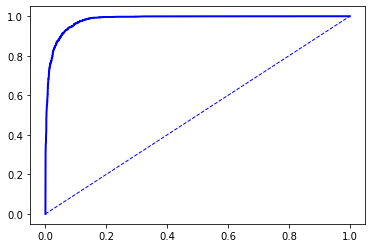

In [37]:
# import pyplot to generate graphs and plot curves
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

# ROC Curve random forest
plt.plot(fpr_rf, tpr_rf, color = 'blue', lw=2, label='ROC Curve (area = %0.3f)' % AUC_rf)

# random guess line
plt.plot([0,1], [0,1], color='blue', lw=1, linestyle='--')

In [12]:
# mark cnn